# Задание 1. Методы понижения размерности

Примените методы понижения размерности: PCA, t-SNE и UMAP к изображениям клеток крови из датасета BloodMNIST. Отобразите проекцию данных на двумерное пространство, так как это допускает наиболее простую визуализацию полученного результата (воспользуйтесь [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)).  Какой метод позволяет лучше разделить данные в пространстве? Опишите ваши наблюдения.

Установка и импорт необходимых библиотек:

In [1]:
!pip install -q umap-learn
!pip install -q --upgrade scikit-image
!pip install -q --upgrade git+https://github.com/MedMNIST/MedMNIST.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 25.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import umap
import medmnist
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from medmnist import INFO
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

matplotlib.style.use("ggplot")

Произведем загрузку данных:

In [3]:
data_flag = "bloodmnist"
download = True

info = INFO[data_flag]
task = info["task"]
n_channels = info["n_channels"]
n_classes = len(info["label"])

DataClass = getattr(medmnist, info["python_class"])

# load the data
bloodmnist = DataClass(split="train", download=download)
print(bloodmnist)

100%|██████████| 35461855/35461855 [00:01<00:00, 18873381.80it/s]


Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 11959
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License: CC BY 4.0


Доступ к данным идет посредством обращения к ключу `bloodmnist.imgs`, доступ к разметке классов — через `bloodmnist.labels`

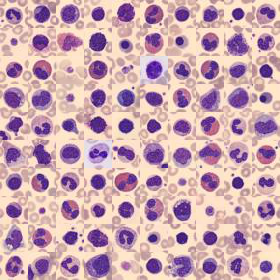

In [4]:
x = bloodmnist.imgs / 255.0
x = x.reshape(-1, 2352)
y = pd.Series(bloodmnist.labels.reshape(-1))
y = y.astype("int").map(dict(zip(range(0, 8), info["label"].values())))


bloodmnist.montage(length=10)

## PCA

In [9]:
y.unique()

array(['platelet',
       'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)',
       'neutrophil', 'erythroblast', 'eosinophil', 'monocyte', 'basophil',
       'lymphocyte'], dtype=object)

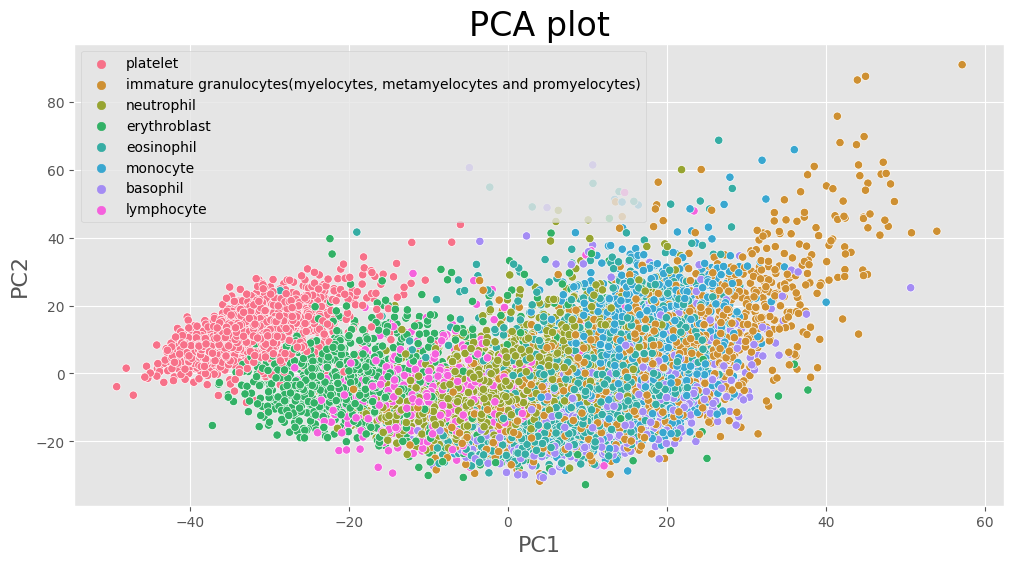

In [12]:
## Your code here
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
pca.fit(x_scaled)
x_reduced = pca.transform(x_scaled)

# Display a scatterplot of the transformed dataset
plt.figure(figsize=(12, 6))
plt.title("PCA plot", size=24)
plt.xlabel("PC1", size=16)
plt.ylabel("PC2", size=16)

sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=y, legend='brief');

## t-SNE

In [15]:
x_scaled.shape

(11959, 2352)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 11959 samples in 0.020s...
[t-SNE] Computed neighbors for 11959 samples in 33.197s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11959
[t-SNE] Computed conditional probabilities for sample 2000 / 11959
[t-SNE] Computed conditional probabilities for sample 3000 / 11959
[t-SNE] Computed conditional probabilities for sample 4000 / 11959
[t-SNE] Computed conditional probabilities for sample 5000 / 11959
[t-SNE] Computed conditional probabilities for sample 6000 / 11959
[t-SNE] Computed conditional probabilities for sample 7000 / 11959
[t-SNE] Computed conditional probabilities for sample 8000 / 11959
[t-SNE] Computed conditional probabilities for sample 9000 / 11959
[t-SNE] Computed conditional probabilities for sample 10000 / 11959
[t-SNE] Computed conditional probabilities for sample 11000 / 11959
[t-SNE] Computed conditional probabilities for sample 11959 / 11959
[t-SNE] Mean sigma: 9.547326
[t-SNE] Computed con

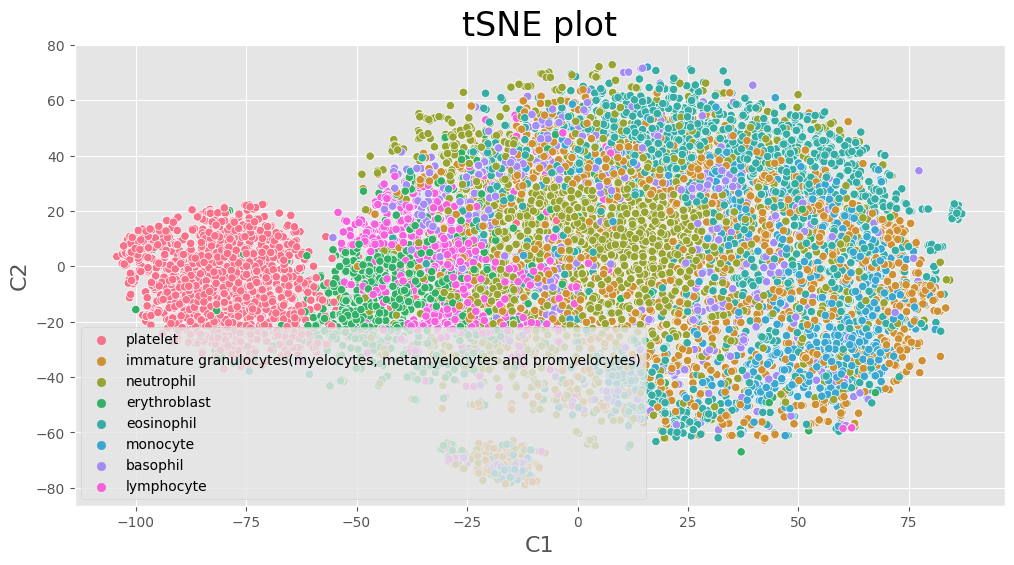

In [16]:
# Your code here
model = manifold.TSNE(
    n_components=2,
    perplexity=10,
    verbose=2,
    learning_rate="auto",
)

x_reduced_tsne = model.fit_transform(x_scaled)


plt.figure(figsize=(12, 6))
plt.title("tSNE plot", size=24)
plt.xlabel("C1", size=16)
plt.ylabel("C2", size=16)

sns.scatterplot(x=x_reduced_tsne[:, 0], y=x_reduced_tsne[:, 1], hue=y, legend='brief');


## UMAP

In [ ]:
# Your code here
from umap import UMAP
from IPython.display import clear_output

# Initializes UMAP with the PCA components
model = UMAP(
    n_components=2,
    min_dist=1,
    n_neighbors=93,
    n_epochs=1000,
    verbose=2,
)

x_reduced_umap = model.fit_transform(x_scaled)
clear_output()


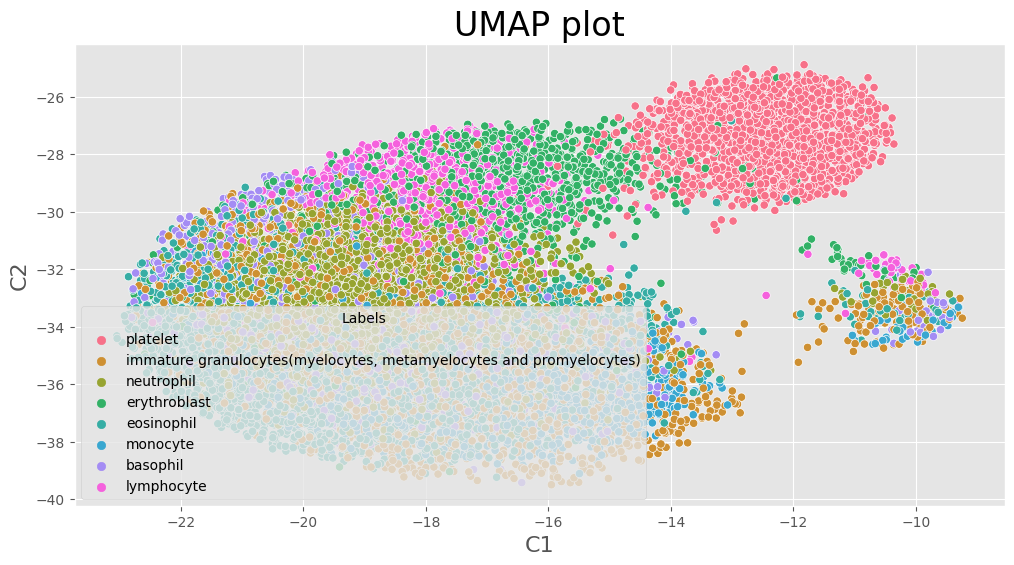

In [20]:
plt.figure(figsize=(12, 6))
plt.title("UMAP plot", size=24)
plt.xlabel("C1", size=16)
plt.ylabel("C2", size=16)

sns.scatterplot(x=x_reduced_umap[:, 0], y=x_reduced_umap[:, 1], hue=y, legend='brief')
plt.legend(loc='lower left', title='Labels')

Выводы:

В принципе видно, что во всех случаях хорошо отделяется только один класс platelet (выделенный красным). Все остальные классы более менее перемешаны. Пожалуй только при применении PCA можно еще визуально отделить зеленый класс от других. В целом, можно сделать вывод, что выделение только 2 компонент не позволяет хорошо отделить классы друг от друга, за исключением одного класса. Возможно если поиграться с параметрами tSNE и UMAP можно найти более хорошее выделение компонент.

## Формат результата

Пример графика для одного из пунктов задания:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX04/result_1_task_ex04.png" width="300">

# Задание 2. Использование понижения размерности для ускорения обучения

Рассмотрите набор данных TissueMNIST. В этом задании вам нужно сравнить производительность двух моделей: обученной с использованием всех доступных признаков и обученной на данных пониженной размерности. От вас требуется:

1. Построить модель `RandomForestClassifier()` и обучить ее на тренировочной выборке, оценить `accuracy` модели на тестовой выборке и время, потраченное на обучение.
2. Построить модель PCA на тренировочных данных и определить число главных компонент, объясняющих 90% дисперсии (или используйте любой другой способ выбора оптимального числа главных компонент, разбиравшийся на лекции).
3. Преобразовать данные тестовой выборки на главные компоненты полученной модели PCA.
4. Построить модель `RandomForestClassifier()` и обучить ее на данных пониженной размерности, оценить `accuracy` модели на тестовой выборке и время, потраченное на обучение.
5. Описать ваши наблюдения, сделать выводы.

Установка и импорт необходимых библиотек:

In [21]:
!pip install -q --upgrade git+https://github.com/MedMNIST/MedMNIST.git
!pip install -q --upgrade scikit-image

  Preparing metadata (setup.py) ... done


In [22]:
import time
import medmnist
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from medmnist import INFO
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

matplotlib.style.use("ggplot")

Произведем загрузку данных:

In [23]:
data_flag = "tissuemnist"
download = True

info = INFO[data_flag]
task = info["task"]
n_channels = info["n_channels"]
n_classes = len(info["label"])

DataClass = getattr(medmnist, info["python_class"])

# load the data
tissuemnist = DataClass(split="test", download=download)
print(tissuemnist)

100%|██████████| 124962739/124962739 [00:05<00:00, 23247939.15it/s]


Dataset TissueMNIST (tissuemnist)
    Number of datapoints: 47280
    Root location: /root/.medmnist
    Split: test
    Task: multi-class
    Number of channels: 1
    Meaning of labels: {'0': 'Collecting Duct, Connecting Tubule', '1': 'Distal Convoluted Tubule', '2': 'Glomerular endothelial cells', '3': 'Interstitial endothelial cells', '4': 'Leukocytes', '5': 'Podocytes', '6': 'Proximal Tubule Segments', '7': 'Thick Ascending Limb'}
    Number of samples: {'train': 165466, 'val': 23640, 'test': 47280}
    Description: We use the BBBC051, available from the Broad Bioimage Benchmark Collection. The dataset contains 236,386 human kidney cortex cells, segmented from 3 reference tissue specimens and organized into 8 categories. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. Each gray-scale image is 32×32×7 pixels, where 7 denotes 7 slices. We take maximum values across the slices and resize them into 28×28 gray-scale images.
    License: CC BY 4

In [24]:
x = tissuemnist.imgs / 255.0
x = x.reshape(-1, 784)
y = tissuemnist.labels

tissuemnist.montage(length=5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [30]:
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

In [31]:
%%time
rng = np.random.RandomState(42)
rf = RandomForestClassifier(n_estimators=200, random_state=rng)

# Your code here
rf.fit(x_train, y_train)

CPU times: user 3min 23s, sys: 595 ms, total: 3min 24s
Wall time: 4min 9s


RandomForestClassifier(n_estimators=200,
                       random_state=RandomState(MT19937) at 0x7C27AD7D9D40)

In [32]:
# Your code here
print(f'Accuracy on test before PCA: {accuracy_score(y_test, rf.predict(x_test)):.3f}')

Accuracy on test before PCA: 0.525


In [34]:
# Your code here
%%time
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

pca = PCA(n_components=0.9)
pca.fit(x_train_scaled)
x_train_reduced = pca.transform(x_train_scaled)
x_test_reduced = pca.transform(x_test_scaled)

rf_pca = RandomForestClassifier(n_estimators=200, random_state=rng)

# Your code here
rf_pca.fit(x_train_reduced, y_train)

CPU times: user 1min 54s, sys: 2.57 s, total: 1min 56s
Wall time: 1min 53s


RandomForestClassifier(n_estimators=200,
                       random_state=RandomState(MT19937) at 0x7C27AD7D9D40)

In [35]:
# Your code here
print(f'Accuracy on test after PCA: {accuracy_score(y_test, rf_pca.predict(x_test_reduced)):.3f}')

Accuracy on test after PCA: 0.506


In [36]:
pca.n_components_

58

In [39]:
x_train_scaled.shape[1] / pca.n_components_

13.517241379310345

In [40]:
np.sum(pca.explained_variance_ratio_)

0.9001334130273835

_Вывод:_

В данном случае применение PCA при сохранении 90% дисперсии исходных признаков сократило размерность пространства признаков более чем в 13 раз, за счет чего было достигнуто ускорение по времени (учитывая стандартизацию, использование PCA и обучение) более чем в 2 раза при незначительном уменьшении точности предсказания на 0.02.


## Формат результата

Получить значения точности (`accuracy`) и времени обучения `RandomForestClassifier()` на обычных данных и данных с пониженной размерностью.

# Задание 3. Отбор признаков

У нас есть датасет из 30 признаков. Известно, что для улучшения качества предсказания достаточно использовать 5 признаков, но неизвестно, какие.

Отберите 5 признаков, используя методы отбора признаков, и увеличьте качество предсказания.

## Формат результата

* Accuracy модели > 0.62.


Установка и импорт необходимых библиотек:

In [41]:
!pip install -q catboost phik boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 5.8 MB/s eta 0:00:00


In [42]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

matplotlib.style.use("ggplot")

Произведем загрузку данных

In [43]:
data_df = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/feature_select_ex.csv"
)
data_df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,target
0,1.200866,1.809315,-1.493981,0.478672,-2.897162,0.374540,0.950714,0.731994,0.598658,0.156019,...,0.360723,-0.171863,135,0.118425,0.252259,5.147098,3,10,2,1
1,3.667649,-0.198241,-2.050940,2.648047,0.509638,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.284437,1.253283,1,1.716076,0.911066,3.195801,1,100,0,1
2,0.474824,-1.747566,0.011443,-2.446388,-1.228831,0.020584,0.969910,0.832443,0.212339,0.181825,...,0.587036,0.723224,-5,-0.169135,0.398492,2.761581,1,1,0,1
3,2.563288,-2.520330,-0.635430,-1.546171,0.041773,0.183405,0.304242,0.524756,0.431945,0.291229,...,0.517336,-0.065198,-8,0.230701,0.633872,4.323173,3,1,4,0
4,-0.610151,3.693206,1.680684,3.764060,1.686301,0.611853,0.139494,0.292145,0.366362,0.456070,...,-0.881526,-0.799493,79,0.208627,0.860287,0.308878,3,1,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.099366,0.619790,-1.990348,-2.711178,-1.532242,0.446726,0.123450,0.205980,0.000943,0.039265,...,0.788255,0.861014,-12,-1.128063,0.154811,4.313848,3,1,2,0
996,0.556409,-0.932216,-1.099109,0.682384,-1.494444,0.977284,0.242354,0.663311,0.839100,0.550660,...,-0.406579,-0.229425,135,0.596009,0.302369,2.653560,1,100,4,1
997,-0.023030,-1.651666,0.513502,-3.119296,-1.236321,0.153145,0.728116,0.600251,0.731251,0.769747,...,-0.947043,1.770957,57,0.898512,0.724384,4.468656,1,10,0,0
998,-0.867747,0.900991,-3.809889,-1.612117,0.789160,0.975410,0.573563,0.341641,0.648465,0.068441,...,-0.985855,-1.061772,103,-0.425756,0.164947,7.237768,1,1,0,0


In [44]:
x_train, x_test, y_train, y_test = train_test_split(
    data_df.drop(columns=["target"]), data_df["target"], test_size=0.2, random_state=42
)

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Use all features, accuracy: {accuracy_rf:.2f}")

Use all features, accuracy: 0.53


In [46]:
# Your code here
from boruta import BorutaPy

# define Boruta feature selection method
model = RandomForestClassifier(random_state=42)

feat_selector = BorutaPy(model, n_estimators=100, verbose=-1, random_state=42)

# find all relevant features
feat_selector.fit(x_train.values, y_train.values)

BorutaPy(estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x7C279F5C6640),
         n_estimators=100, random_state=RandomState(MT19937) at 0x7C279F5C6640,
         verbose=-1)

In [ ]:
keep = x_train.columns[feat_selector.support_].to_list()
normal = x_train.columns[feat_selector.support_weak_].to_list()
drop = x_train.columns[
    ~(feat_selector.support_ | feat_selector.support_weak_)
].to_list()

print("features keep:", keep)
print("features normal:", normal)
print("features drop:", drop)

In [49]:
feature_ranks = list(
    zip(x_train.columns, feat_selector.ranking_, feat_selector.support_)
)

df = pd.DataFrame(feature_ranks, columns=["feature", "rank", "boruta_keep"])
df.sort_values("rank")

,feature,rank,boruta_keep
3,feature_4,1,True
21,feature_22,1,True
0,feature_1,2,False
22,feature_23,3,False
4,feature_5,4,False
25,feature_26,5,False
11,feature_12,6,False
24,feature_25,7,False
1,feature_2,8,False
6,feature_7,9,False


In [51]:
keep = list(df.sort_values("rank")['feature'].head())
keep

In [58]:
rf_after = RandomForestClassifier(random_state=42)
rf_after.fit(x_train[keep], y_train)
y_pred_rf_after = rf_after.predict(x_test[keep])
accuracy_rf_after = accuracy_score(y_test, y_pred_rf_after)
print(f"Use top-5 Boruta features, accuracy: {accuracy_rf_after:.2f}")

Use top-5 Boruta features, accuracy: 0.59


Видим, что при использовании Boruta для отбора 5 признаков точность улучшается, но недостаточно (< 0.62). Попробуем применить подход permutation importance.

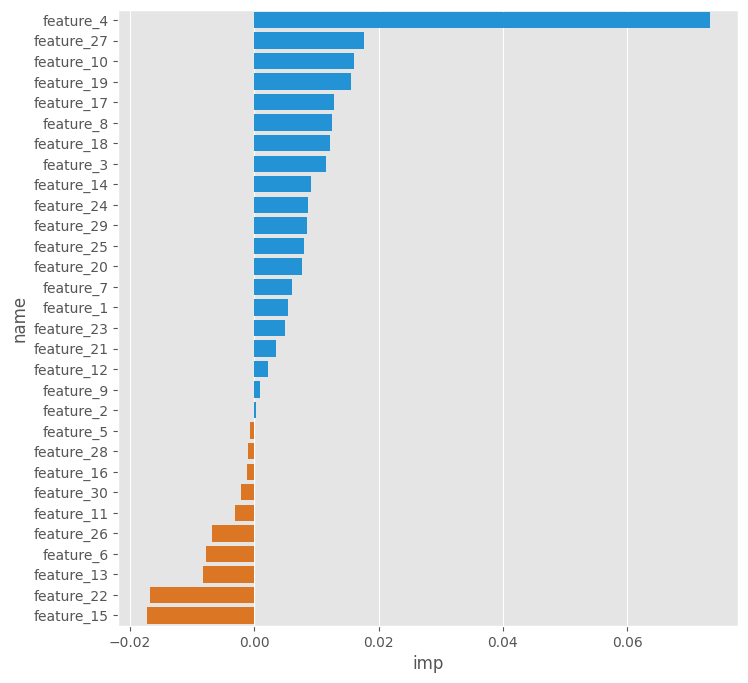

In [54]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

r = permutation_importance(model, x_test, y_test, n_repeats=100, random_state=42)

df = pd.DataFrame({"name": x_train.columns, "imp": r.importances_mean}).sort_values(
    "imp", ascending=False
)

df["colors"] = [
    sns.xkcd_rgb["orange"] if x < 0 else sns.xkcd_rgb["azure"] for x in df["imp"]
]


plt.figure(figsize=(8, 8))
sns.barplot(data=df, y="name", x="imp", palette=df.colors, orient="h")
plt.show()

In [56]:
keep_perm_imp = list(df['name'].head())
keep_perm_imp

['feature_4', 'feature_27', 'feature_10', 'feature_19', 'feature_17']

In [59]:
rf_perm_imp = RandomForestClassifier(random_state=42)
rf_perm_imp.fit(x_train[keep_perm_imp], y_train)
y_pred_perm_imp = rf_perm_imp.predict(x_test[keep_perm_imp])
accuracy_perm_imp = accuracy_score(y_test, y_pred_perm_imp)
print(f"Use top-5 features using permutation_importance func, accuracy: {accuracy_perm_imp:.2f}")

Use top-5 features using permutation_importance func, accuracy: 0.63


Используя метод отбора признаков permutation importance, сумели добиться улучшения точности предсказания до 0.63. Это уже хорошо, но попробуем еще отобрать признаки с помощью CatBoost.

In [61]:
model = CatBoostClassifier(random_state=42, thread_count=-1)
model.fit(
    x_train,
    y_train,
    eval_set=(x_test, y_test),
    verbose=False,
    plot=False,
    early_stopping_rounds=100,
)

summary = model.select_features(
    x_train,
    y_train,
    eval_set=(x_test, y_test),
    features_for_select=list(x_train.columns),
    num_features_to_select=5,
    steps=5,
    train_final_model=False,
    logging_level="Silent",
)

keep_catboost = summary["selected_features_names"]
keep_catboost

['feature_4', 'feature_9', 'feature_10', 'feature_18', 'feature_27']

In [63]:
rf_catboost = RandomForestClassifier(random_state=42)
rf_catboost.fit(x_train[keep_catboost], y_train)
y_pred_catboost = rf_catboost.predict(x_test[keep_catboost])
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"Use top-5 CatBoost features, accuracy: {accuracy_catboost:.2f}")

Use top-5 CatBoost features, accuracy: 0.64


Видно, что при использовании фичей, отобранных катбустом точность еще увеличилась, но не сильно (до 0.64). При этом можно заметить, что во всех 3 подходах признак feature_4 является самым важным, однако остальные топ-признаки отличаются между методами, особенно между Boruta и остальными 2 методами. Среди признаков, отобранных с помощью CatBoost и permutation importance 3 из 5 признаков совпадают (4, 10 и 27 признаки)

# Задание 4. Бинарная классификация с LogisticRegression

В этом задании вам нужно решить задачу бинарной классификации. Используя только [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), добейтесь качества `accuracy` выше 0.91.

Что можно:
* Генерировать и отбирать признаки

Что нельзя:
* Менять модель

## Формат результата

* Accuracy модели > 0.91.


Импорт необходимых библиотек:

In [140]:
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

matplotlib.style.use("ggplot")

Произведем загрузку данных:

In [141]:
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/feature_engineering_data.csv

In [142]:
df = pd.read_csv("/content/feature_engineering_data.csv")
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,target
0,0.774059,140.294418,0.377009,4,0.233130,category_2,1
1,0.142857,168.224364,0.000856,23,0.427976,category_2,1
2,0.687500,165.427328,-1.353440,16,-0.996328,category_2,0
3,1.000000,188.878096,13.558928,4,0.332452,category_2,0
4,0.000000,183.025326,5.329313,4,-0.429498,category_1,1
...,...,...,...,...,...,...,...
1679,0.333333,212.082024,1.038087,29,0.427975,category_3,1
1680,0.000000,204.187500,-0.112248,19,-0.084355,category_1,1
1681,1.000000,159.500022,9.209267,19,0.045443,category_2,1
1682,0.454546,169.714358,2.718016,25,-0.507499,category_1,1


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1684 non-null   float64
 1   feature_2  1684 non-null   float64
 2   feature_3  1684 non-null   float64
 3   feature_4  1684 non-null   int64  
 4   feature_5  1684 non-null   float64
 5   feature_6  1684 non-null   object 
 6   target     1684 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 92.2+ KB


In [144]:
x = df.drop(columns=["target"])
y = df["target"]


# We make a 80/20% train/test split of the data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [145]:
x_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
1671,0.000000,157.300000,4.250863,11,-0.525181,category_2
513,0.619403,181.981338,9.292724,17,-0.760408,category_3
163,1.000000,201.666586,13.166446,28,0.457715,category_3
1177,0.538462,169.012800,-5.470341,9,-0.499668,category_3
936,0.428571,166.589170,5.256423,4,-0.351599,category_3


In [146]:
x_train['feature_6'].value_counts()

category_3    540
category_1    453
category_2    354
Name: feature_6, dtype: int64

In [147]:
mapper = {'category_3': 1, 'category_1': 2, 'category_2': 3}
x_train['feature_6'] = x_train['feature_6'].map(mapper)
x_test['feature_6'] = x_test['feature_6'].map(mapper)

In [148]:
# Your code here
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Make predictions
print("Accuracy of the model = %.2f" % model.score(x_test, y_test))

Accuracy of the model = 0.48


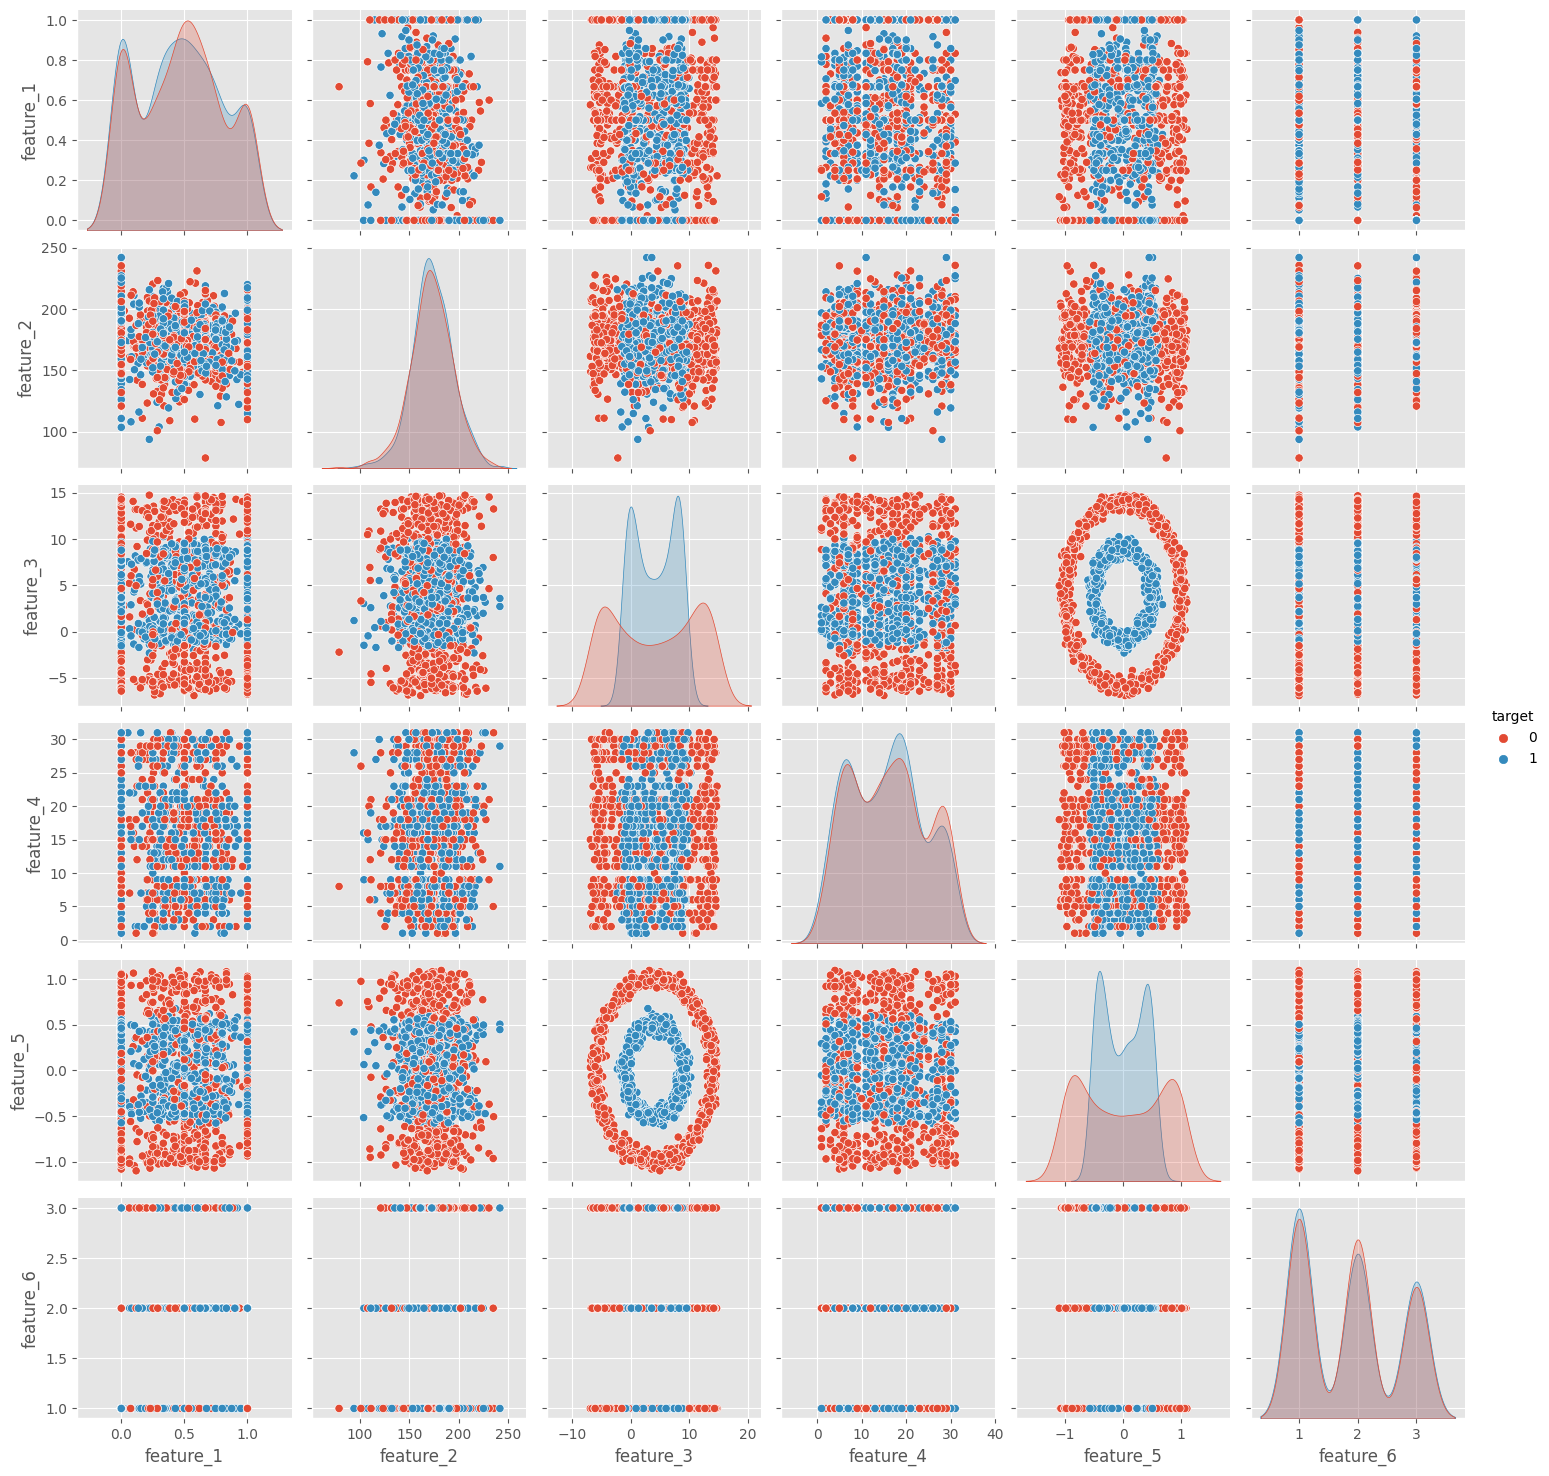

In [151]:
sns.pairplot(pd.concat([x_train, y_train], axis=1), hue='target')

Видно, что объекты разделимы по значениям 3 и 5 фичей. (по этим фичам все объекты разделяются на 2 кластера)

In [152]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

попробуем кластеризовать их с помощью DBSCAN

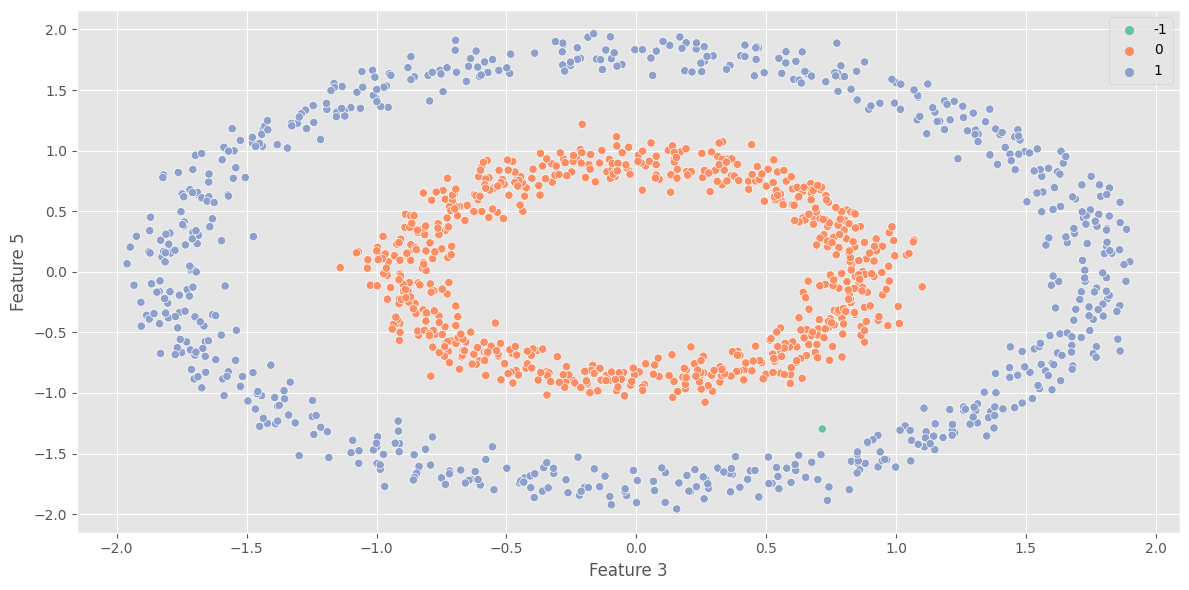

In [153]:
def plot_dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(data)

    sns.scatterplot(
        x=data[:, 0], y=data[:, 1], hue=dbscan_labels, palette="Set2"
    )

plt.figure(figsize=(12, 6))

plot_dbscan_clustering(
    x_train_scaled[:, [2,4]], eps=0.2, min_samples=5
)

plt.xlabel("Feature 3")
plt.ylabel("Feature 5")
plt.tight_layout()
plt.show()

Добавим фичу являющуюся предсказанием DBSCAN, к какому кластеру принадлежит объект.

In [154]:
dbscan = DBSCAN(eps=0.2, min_samples=5)

dbscan_train_labels = dbscan.fit_predict(x_train_scaled[:, [2,4]])
dbscan_test_labels = dbscan.fit_predict(x_test_scaled[:, [2,4]])

In [155]:
x_train_db = np.hstack((x_train_scaled, dbscan_train_labels.reshape(-1, 1)))
x_test_db = np.hstack((x_test_scaled, dbscan_test_labels.reshape(-1, 1)))

In [156]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_db, y_train)

# Make predictions
print("Accuracy of the model = %.2f" % model.score(x_test_db, y_test))

Accuracy of the model = 0.96


В итоге получилось значение точности 0.96, что в 2 раза больше точности бейзлайна.